In [47]:
import pandas as pd
# reading dataset
data = pd.read_csv("grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              439 non-null    object 
 1   PM1(mcg/m³)      439 non-null    float64
 2   PM10(mcg/m³)     439 non-null    float64
 3   PM2.5(mcg/m³)    439 non-null    float64
 4   AQI US           439 non-null    float64
 5   NO(mcg/m³)       439 non-null    float64
 6   NO2(mcg/m³)      439 non-null    float64
 7   CH2O(mcg/m³)     439 non-null    float64
 8   SO2(mcg/m³)      439 non-null    float64
 9   Temperature(°C)  439 non-null    float64
 10  Humidity(%)      439 non-null    float64
dtypes: float64(10), object(1)
memory usage: 37.9+ KB


In [49]:
# Prepring dataset

In [50]:
data['Day'] = pd.to_datetime(data['Day'])

In [51]:
# Preparing for pm1 training the model and testing it

In [52]:
pm1 = data.drop('PM10(mcg/m³)', axis=1)
pm1 = pm1.drop('PM2.5(mcg/m³)', axis = 1)
pm1 = pm1.drop('Day', axis=1)

In [53]:
X = pm1.drop('PM1(mcg/m³)', axis=1)
Y = pm1['PM1(mcg/m³)']

In [54]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [55]:
import lightgbm as lgb

# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

In [56]:
# Making predictions
reg_pred = model_reg.predict(X_test)

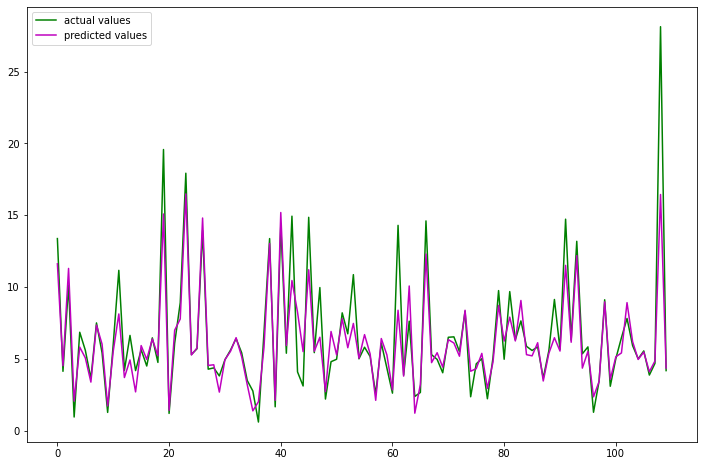

In [57]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [58]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.8138405694367675


In [59]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))



1.0275259575950282


In [60]:
# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

3.3211580726936316


#### 

In [61]:
# Catboost regressor
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

Learning rate set to 0.034348
0:	learn: 3.7723204	total: 1.35ms	remaining: 1.35s
1:	learn: 3.7192570	total: 2.45ms	remaining: 1.22s
2:	learn: 3.6559844	total: 3.61ms	remaining: 1.2s
3:	learn: 3.5965826	total: 4.7ms	remaining: 1.17s
4:	learn: 3.5378912	total: 5.71ms	remaining: 1.14s
5:	learn: 3.4826744	total: 6.53ms	remaining: 1.08s
6:	learn: 3.4269893	total: 7.58ms	remaining: 1.07s
7:	learn: 3.3754912	total: 8.56ms	remaining: 1.06s
8:	learn: 3.3196043	total: 9.51ms	remaining: 1.05s
9:	learn: 3.2786057	total: 10.6ms	remaining: 1.05s
10:	learn: 3.2280522	total: 11.6ms	remaining: 1.04s
11:	learn: 3.1808748	total: 12.5ms	remaining: 1.03s
12:	learn: 3.1374615	total: 13.4ms	remaining: 1.01s
13:	learn: 3.0957114	total: 14.3ms	remaining: 1s
14:	learn: 3.0539241	total: 15ms	remaining: 987ms
15:	learn: 3.0108297	total: 16ms	remaining: 984ms
16:	learn: 2.9644161	total: 16.9ms	remaining: 975ms
17:	learn: 2.9248161	total: 17.8ms	remaining: 969ms
18:	learn: 2.8858800	total: 18.9ms	remaining: 974ms
1

258:	learn: 1.0389020	total: 178ms	remaining: 510ms
259:	learn: 1.0371244	total: 179ms	remaining: 510ms
260:	learn: 1.0362833	total: 180ms	remaining: 509ms
261:	learn: 1.0355045	total: 180ms	remaining: 508ms
262:	learn: 1.0348309	total: 181ms	remaining: 508ms
263:	learn: 1.0336688	total: 182ms	remaining: 507ms
264:	learn: 1.0313196	total: 183ms	remaining: 506ms
265:	learn: 1.0307744	total: 183ms	remaining: 505ms
266:	learn: 1.0300458	total: 184ms	remaining: 504ms
267:	learn: 1.0283586	total: 184ms	remaining: 503ms
268:	learn: 1.0276536	total: 185ms	remaining: 503ms
269:	learn: 1.0269339	total: 186ms	remaining: 502ms
270:	learn: 1.0254928	total: 186ms	remaining: 501ms
271:	learn: 1.0237076	total: 187ms	remaining: 500ms
272:	learn: 1.0219892	total: 187ms	remaining: 499ms
273:	learn: 1.0195035	total: 188ms	remaining: 498ms
274:	learn: 1.0188133	total: 189ms	remaining: 497ms
275:	learn: 1.0179076	total: 189ms	remaining: 497ms
276:	learn: 1.0167485	total: 190ms	remaining: 496ms
277:	learn: 

544:	learn: 0.6205914	total: 359ms	remaining: 300ms
545:	learn: 0.6203714	total: 360ms	remaining: 299ms
546:	learn: 0.6202791	total: 360ms	remaining: 298ms
547:	learn: 0.6195077	total: 362ms	remaining: 298ms
548:	learn: 0.6178735	total: 362ms	remaining: 298ms
549:	learn: 0.6168129	total: 363ms	remaining: 297ms
550:	learn: 0.6157761	total: 364ms	remaining: 296ms
551:	learn: 0.6156559	total: 364ms	remaining: 296ms
552:	learn: 0.6154270	total: 365ms	remaining: 295ms
553:	learn: 0.6138698	total: 365ms	remaining: 294ms
554:	learn: 0.6129229	total: 366ms	remaining: 293ms
555:	learn: 0.6118753	total: 367ms	remaining: 293ms
556:	learn: 0.6117585	total: 367ms	remaining: 292ms
557:	learn: 0.6103374	total: 368ms	remaining: 291ms
558:	learn: 0.6086967	total: 368ms	remaining: 291ms
559:	learn: 0.6085701	total: 369ms	remaining: 290ms
560:	learn: 0.6059246	total: 370ms	remaining: 289ms
561:	learn: 0.6053257	total: 370ms	remaining: 289ms
562:	learn: 0.6036453	total: 371ms	remaining: 288ms
563:	learn: 

839:	learn: 0.4060424	total: 540ms	remaining: 103ms
840:	learn: 0.4052976	total: 540ms	remaining: 102ms
841:	learn: 0.4045621	total: 541ms	remaining: 102ms
842:	learn: 0.4037156	total: 542ms	remaining: 101ms
843:	learn: 0.4035316	total: 542ms	remaining: 100ms
844:	learn: 0.4032932	total: 543ms	remaining: 99.5ms
845:	learn: 0.4027065	total: 543ms	remaining: 98.9ms
846:	learn: 0.4022559	total: 544ms	remaining: 98.2ms
847:	learn: 0.4017604	total: 544ms	remaining: 97.6ms
848:	learn: 0.4010608	total: 545ms	remaining: 96.9ms
849:	learn: 0.4006983	total: 545ms	remaining: 96.3ms
850:	learn: 0.3999983	total: 546ms	remaining: 95.6ms
851:	learn: 0.3991152	total: 547ms	remaining: 94.9ms
852:	learn: 0.3983576	total: 547ms	remaining: 94.3ms
853:	learn: 0.3976770	total: 548ms	remaining: 93.6ms
854:	learn: 0.3968391	total: 548ms	remaining: 93ms
855:	learn: 0.3962683	total: 549ms	remaining: 92.3ms
856:	learn: 0.3952608	total: 549ms	remaining: 91.7ms
857:	learn: 0.3945063	total: 550ms	remaining: 91ms
85

In [62]:
# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

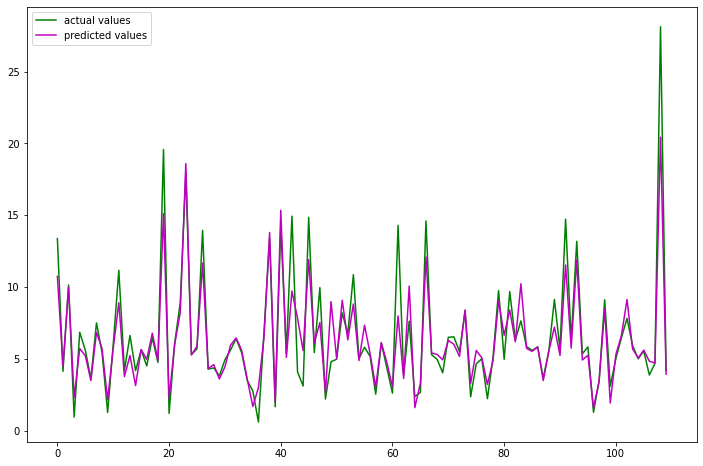

In [63]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [64]:
# calculating the r score 
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.8501841770447388


In [65]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

0.9719629270545342
2.672773698972502


In [66]:
# importing tensorflow module
import tensorflow as tf

# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
                                 # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])

2022-12-04 13:48:59.266238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 13:48:59.459248: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 13:48:59.459268: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 13:49:00.520051: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [67]:
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [68]:
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 3.1620 - mae: 3.1620
Epoch 2/200
11/11 [==============================] - 0s 1ms/step - loss: 2.3867 - mae: 2.3867
Epoch 3/200
11/11 [==============================] - 0s 1ms/step - loss: 2.1674 - mae: 2.1674
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 2.0160 - mae: 2.0160
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.8933 - mae: 1.8933
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7977 - mae: 1.7977
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7409 - mae: 1.7409
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6911 - mae: 1.6911
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6574 - mae: 1.6574
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6275 - mae: 1.6275
Epoch 11/200
11/11 [==============================] - 0s 3m

11/11 [==============================] - 0s 2ms/step - loss: 1.3139 - mae: 1.3139
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3308 - mae: 1.3308
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3084 - mae: 1.3084
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3126 - mae: 1.3126
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3139 - mae: 1.3139
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3121 - mae: 1.3121
Epoch 93/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3254 - mae: 1.3254
Epoch 94/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3042 - mae: 1.3042
Epoch 95/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3104 - mae: 1.3104
Epoch 96/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3156 - mae: 1.3156
Epoch 97/200
11/11 [==============================] - 0s 3ms/st

11/11 [==============================] - 0s 2ms/step - loss: 1.2586 - mae: 1.2586
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2580 - mae: 1.2580
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2788 - mae: 1.2788
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2867 - mae: 1.2867
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2669 - mae: 1.2669
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2741 - mae: 1.2741
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2698 - mae: 1.2698
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2699 - mae: 1.2699
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2593 - mae: 1.2593
Epoch 181/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2916 - mae: 1.2916
Epoch 182/200
11/11 [==============================] -

In [69]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

4/4 [==============================] - 0s 1ms/step
R score is : 0.7931845555034804


In [71]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

1.2331396180066194
3.689669553506884


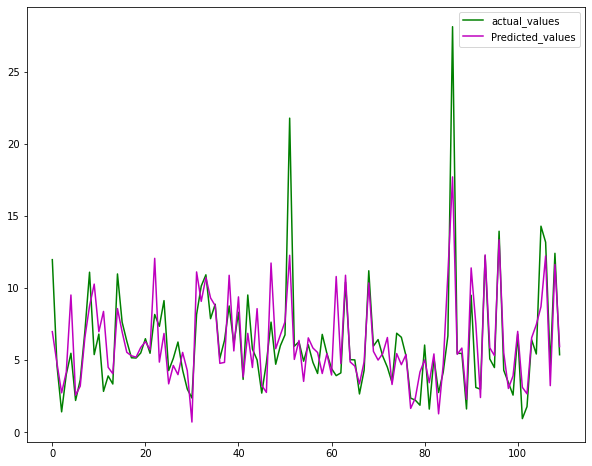

In [52]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [53]:
# pm2.5 regression models


In [72]:
pm2 = data.drop('PM10(mcg/m³)', axis=1)
pm2 = pm2.drop('PM1(mcg/m³)', axis = 1)
pm2 = pm2.drop('Day', axis=1)

In [73]:
X_pm = pm2.drop('PM2.5(mcg/m³)', axis=1)
Y_pm = pm2['PM2.5(mcg/m³)']

In [74]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25, random_state=0)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

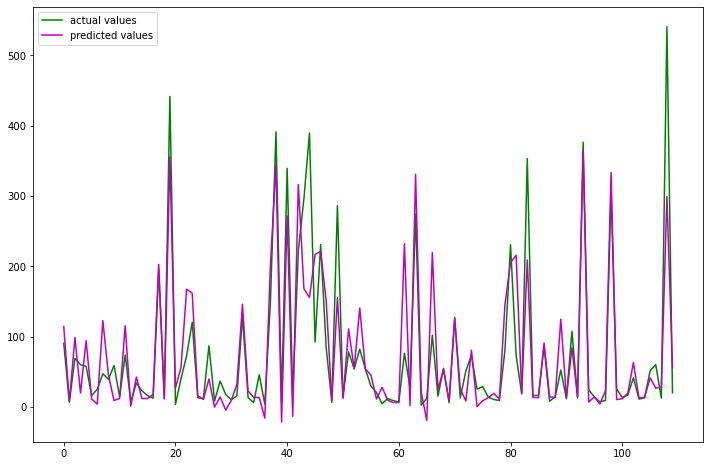

In [75]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [76]:
# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.7445767102807783


In [77]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))

# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

31.791548609801804
3042.092502982969


In [78]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.034348
0:	learn: 113.7231191	total: 2.3ms	remaining: 2.3s
1:	learn: 111.8926954	total: 4.67ms	remaining: 2.33s
2:	learn: 109.7608171	total: 6.5ms	remaining: 2.16s
3:	learn: 107.6242940	total: 7.95ms	remaining: 1.98s
4:	learn: 105.7852525	total: 9.61ms	remaining: 1.91s
5:	learn: 103.8981890	total: 10.9ms	remaining: 1.81s
6:	learn: 101.9443884	total: 12.2ms	remaining: 1.73s
7:	learn: 100.1816950	total: 13.5ms	remaining: 1.67s
8:	learn: 98.4276263	total: 14.6ms	remaining: 1.61s
9:	learn: 96.9598829	total: 15.6ms	remaining: 1.54s
10:	learn: 95.2972959	total: 16.6ms	remaining: 1.49s
11:	learn: 93.6105622	total: 17.6ms	remaining: 1.45s
12:	learn: 92.0112300	total: 18.5ms	remaining: 1.4s
13:	learn: 90.4355915	total: 19.3ms	remaining: 1.36s
14:	learn: 89.1307447	total: 20.1ms	remaining: 1.32s
15:	learn: 87.7162597	total: 20.9ms	remaining: 1.28s
16:	learn: 86.5216816	total: 21.7ms	remaining: 1.26s
17:	learn: 85.3526893	total: 22.6ms	remaining: 1.23s
18:	learn: 84.1474664	

251:	learn: 31.9798701	total: 178ms	remaining: 530ms
252:	learn: 31.8680665	total: 179ms	remaining: 528ms
253:	learn: 31.8154065	total: 180ms	remaining: 527ms
254:	learn: 31.7569387	total: 180ms	remaining: 526ms
255:	learn: 31.7303403	total: 181ms	remaining: 525ms
256:	learn: 31.6328272	total: 181ms	remaining: 524ms
257:	learn: 31.5616107	total: 182ms	remaining: 523ms
258:	learn: 31.5053800	total: 182ms	remaining: 522ms
259:	learn: 31.4617316	total: 183ms	remaining: 521ms
260:	learn: 31.4187291	total: 184ms	remaining: 520ms
261:	learn: 31.3672872	total: 184ms	remaining: 519ms
262:	learn: 31.2710509	total: 185ms	remaining: 518ms
263:	learn: 31.2258329	total: 185ms	remaining: 517ms
264:	learn: 31.2162148	total: 186ms	remaining: 515ms
265:	learn: 31.1231429	total: 186ms	remaining: 514ms
266:	learn: 31.0629425	total: 187ms	remaining: 513ms
267:	learn: 31.0429820	total: 187ms	remaining: 512ms
268:	learn: 30.9913978	total: 188ms	remaining: 511ms
269:	learn: 30.9577881	total: 189ms	remaining:

567:	learn: 19.4244664	total: 376ms	remaining: 286ms
568:	learn: 19.4222982	total: 377ms	remaining: 285ms
569:	learn: 19.3962955	total: 377ms	remaining: 285ms
570:	learn: 19.3467563	total: 396ms	remaining: 298ms
571:	learn: 19.3361297	total: 397ms	remaining: 297ms
572:	learn: 19.3125237	total: 398ms	remaining: 296ms
573:	learn: 19.3106649	total: 398ms	remaining: 295ms
574:	learn: 19.2850051	total: 399ms	remaining: 295ms
575:	learn: 19.2648156	total: 399ms	remaining: 294ms
576:	learn: 19.2502399	total: 400ms	remaining: 293ms
577:	learn: 19.2356300	total: 417ms	remaining: 304ms
578:	learn: 19.2281650	total: 418ms	remaining: 304ms
579:	learn: 19.2188594	total: 418ms	remaining: 303ms
580:	learn: 19.2170605	total: 419ms	remaining: 302ms
581:	learn: 19.1917442	total: 420ms	remaining: 302ms
582:	learn: 19.1667638	total: 421ms	remaining: 301ms
583:	learn: 19.0919789	total: 422ms	remaining: 301ms
584:	learn: 19.0461944	total: 423ms	remaining: 300ms
585:	learn: 19.0332987	total: 424ms	remaining:

804:	learn: 13.1734912	total: 560ms	remaining: 136ms
805:	learn: 13.1588478	total: 561ms	remaining: 135ms
806:	learn: 13.1453123	total: 562ms	remaining: 134ms
807:	learn: 13.1246798	total: 563ms	remaining: 134ms
808:	learn: 13.1058990	total: 563ms	remaining: 133ms
809:	learn: 13.1010118	total: 564ms	remaining: 132ms
810:	learn: 13.0880326	total: 565ms	remaining: 132ms
811:	learn: 13.0746796	total: 565ms	remaining: 131ms
812:	learn: 13.0385126	total: 566ms	remaining: 130ms
813:	learn: 13.0183108	total: 566ms	remaining: 129ms
814:	learn: 12.9714256	total: 567ms	remaining: 129ms
815:	learn: 12.9551060	total: 568ms	remaining: 128ms
816:	learn: 12.9501517	total: 568ms	remaining: 127ms
817:	learn: 12.9373101	total: 569ms	remaining: 127ms
818:	learn: 12.9095650	total: 569ms	remaining: 126ms
819:	learn: 12.8775748	total: 570ms	remaining: 125ms
820:	learn: 12.8653195	total: 571ms	remaining: 124ms
821:	learn: 12.8344208	total: 571ms	remaining: 124ms
822:	learn: 12.8143245	total: 572ms	remaining:

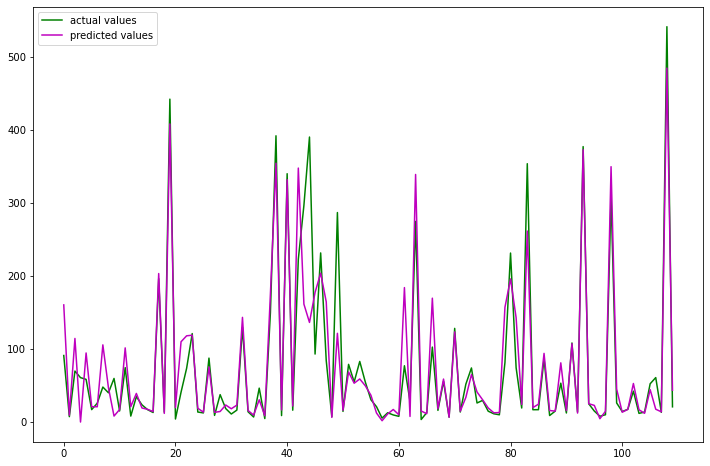

In [79]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [80]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.8303657382484211


In [81]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

23.622851237385852
2020.3448028987402


In [82]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 105.6435 - mae: 105.6435
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 100.7685 - mae: 100.7685
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 96.0320 - mae: 96.0320
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 90.9110 - mae: 90.9110
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 85.2851 - mae: 85.2851
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 79.5884 - mae: 79.5884
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 73.5903 - mae: 73.5903
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 68.4757 - mae: 68.4757
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 64.0364 - mae: 64.0364
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 59.5783 - mae: 59.5783
Epoch 11/200
11/11 [===============

11/11 [==============================] - 0s 2ms/step - loss: 36.6766 - mae: 36.6766
Epoch 86/200
11/11 [==============================] - 0s 2ms/step - loss: 36.4313 - mae: 36.4313
Epoch 87/200
11/11 [==============================] - 0s 2ms/step - loss: 36.2991 - mae: 36.2991
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 36.2079 - mae: 36.2079
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 35.9163 - mae: 35.9163
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 35.6565 - mae: 35.6565
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 35.4226 - mae: 35.4226
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 35.3439 - mae: 35.3439
Epoch 93/200
11/11 [==============================] - 0s 2ms/step - loss: 35.2105 - mae: 35.2105
Epoch 94/200
11/11 [==============================] - 0s 2ms/step - loss: 35.1930 - mae: 35.1930
Epoch 95/200
11/11 [=======================

11/11 [==============================] - 0s 2ms/step - loss: 30.6373 - mae: 30.6373
Epoch 169/200
11/11 [==============================] - 0s 2ms/step - loss: 30.6684 - mae: 30.6684
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 31.1536 - mae: 31.1536
Epoch 171/200
11/11 [==============================] - 0s 3ms/step - loss: 30.6841 - mae: 30.6841
Epoch 172/200
11/11 [==============================] - 0s 3ms/step - loss: 31.2699 - mae: 31.2699
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 30.4468 - mae: 30.4468
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 30.2716 - mae: 30.2716
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 30.3857 - mae: 30.3857
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 30.1848 - mae: 30.1848
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 30.0663 - mae: 30.0663
Epoch 178/200
11/11 [=============

In [83]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

4/4 [==============================] - 0s 1ms/step
R score is : 0.7503574154603517


In [84]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

26.076028569524937
2973.2442788916337


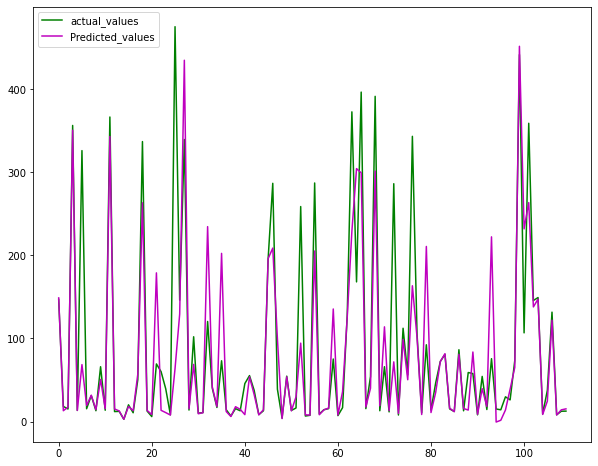

In [74]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [85]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis = 1)
pm10 = pm10.drop('Day', axis=1)

In [86]:
X_pm = pm10.drop('PM10(mcg/m³)', axis=1)
Y_pm = pm10['PM10(mcg/m³)']

In [87]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25, random_state=0)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

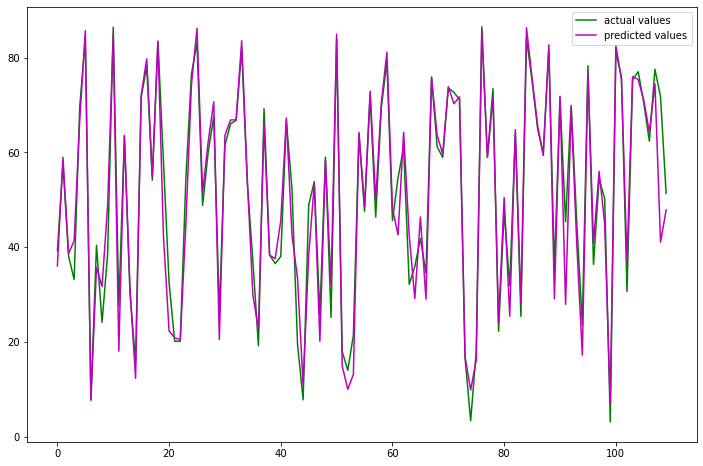

In [88]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [89]:
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.9335898096026211


In [90]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))

# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

3.6777532528294654
32.93030742458598


In [91]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.034348
0:	learn: 22.3615496	total: 1.38ms	remaining: 1.38s
1:	learn: 21.7684974	total: 2.42ms	remaining: 1.21s
2:	learn: 21.2099516	total: 3.46ms	remaining: 1.15s
3:	learn: 20.7083605	total: 4.46ms	remaining: 1.11s
4:	learn: 20.2089433	total: 5.43ms	remaining: 1.08s
5:	learn: 19.6756231	total: 6.38ms	remaining: 1.06s
6:	learn: 19.1501440	total: 7.32ms	remaining: 1.04s
7:	learn: 18.7052511	total: 8.27ms	remaining: 1.02s
8:	learn: 18.2578720	total: 9.19ms	remaining: 1.01s
9:	learn: 17.8524962	total: 10ms	remaining: 992ms
10:	learn: 17.4020217	total: 10.9ms	remaining: 977ms
11:	learn: 16.9992769	total: 11.7ms	remaining: 967ms
12:	learn: 16.5938067	total: 12.7ms	remaining: 962ms
13:	learn: 16.2092018	total: 13.5ms	remaining: 954ms
14:	learn: 15.8534734	total: 14.4ms	remaining: 947ms
15:	learn: 15.4821121	total: 15.3ms	remaining: 939ms
16:	learn: 15.0994892	total: 16.1ms	remaining: 933ms
17:	learn: 14.7525131	total: 16.9ms	remaining: 924ms
18:	learn: 14.4069598	total:

235:	learn: 3.2784016	total: 172ms	remaining: 556ms
236:	learn: 3.2752425	total: 173ms	remaining: 556ms
237:	learn: 3.2720457	total: 173ms	remaining: 555ms
238:	learn: 3.2635233	total: 174ms	remaining: 554ms
239:	learn: 3.2598244	total: 175ms	remaining: 553ms
240:	learn: 3.2504288	total: 175ms	remaining: 553ms
241:	learn: 3.2483292	total: 176ms	remaining: 552ms
242:	learn: 3.2449034	total: 177ms	remaining: 550ms
243:	learn: 3.2395658	total: 177ms	remaining: 549ms
244:	learn: 3.2367482	total: 178ms	remaining: 548ms
245:	learn: 3.2352004	total: 178ms	remaining: 547ms
246:	learn: 3.2325189	total: 179ms	remaining: 546ms
247:	learn: 3.2303603	total: 180ms	remaining: 545ms
248:	learn: 3.2241566	total: 180ms	remaining: 544ms
249:	learn: 3.2223017	total: 181ms	remaining: 543ms
250:	learn: 3.2184669	total: 182ms	remaining: 542ms
251:	learn: 3.2156634	total: 182ms	remaining: 541ms
252:	learn: 3.2092664	total: 183ms	remaining: 540ms
253:	learn: 3.2056204	total: 184ms	remaining: 539ms
254:	learn: 

511:	learn: 1.9463010	total: 352ms	remaining: 336ms
512:	learn: 1.9452176	total: 353ms	remaining: 335ms
513:	learn: 1.9408301	total: 354ms	remaining: 334ms
514:	learn: 1.9346341	total: 354ms	remaining: 334ms
515:	learn: 1.9325505	total: 355ms	remaining: 333ms
516:	learn: 1.9299286	total: 356ms	remaining: 332ms
517:	learn: 1.9288844	total: 356ms	remaining: 332ms
518:	learn: 1.9283501	total: 357ms	remaining: 331ms
519:	learn: 1.9230287	total: 358ms	remaining: 330ms
520:	learn: 1.9184529	total: 358ms	remaining: 330ms
521:	learn: 1.9160271	total: 359ms	remaining: 329ms
522:	learn: 1.9113527	total: 360ms	remaining: 328ms
523:	learn: 1.9066361	total: 360ms	remaining: 327ms
524:	learn: 1.9047138	total: 361ms	remaining: 327ms
525:	learn: 1.9042618	total: 362ms	remaining: 326ms
526:	learn: 1.9002687	total: 362ms	remaining: 325ms
527:	learn: 1.8965653	total: 363ms	remaining: 324ms
528:	learn: 1.8933102	total: 363ms	remaining: 324ms
529:	learn: 1.8922312	total: 364ms	remaining: 323ms
530:	learn: 

797:	learn: 1.2567238	total: 533ms	remaining: 135ms
798:	learn: 1.2561061	total: 534ms	remaining: 134ms
799:	learn: 1.2559549	total: 534ms	remaining: 134ms
800:	learn: 1.2553978	total: 535ms	remaining: 133ms
801:	learn: 1.2520104	total: 536ms	remaining: 132ms
802:	learn: 1.2518549	total: 536ms	remaining: 132ms
803:	learn: 1.2490686	total: 537ms	remaining: 131ms
804:	learn: 1.2477180	total: 538ms	remaining: 130ms
805:	learn: 1.2459159	total: 538ms	remaining: 130ms
806:	learn: 1.2457766	total: 539ms	remaining: 129ms
807:	learn: 1.2446885	total: 539ms	remaining: 128ms
808:	learn: 1.2408694	total: 540ms	remaining: 127ms
809:	learn: 1.2407137	total: 541ms	remaining: 127ms
810:	learn: 1.2386223	total: 541ms	remaining: 126ms
811:	learn: 1.2358471	total: 542ms	remaining: 125ms
812:	learn: 1.2340560	total: 542ms	remaining: 125ms
813:	learn: 1.2323669	total: 543ms	remaining: 124ms
814:	learn: 1.2322176	total: 544ms	remaining: 123ms
815:	learn: 1.2301089	total: 544ms	remaining: 123ms
816:	learn: 

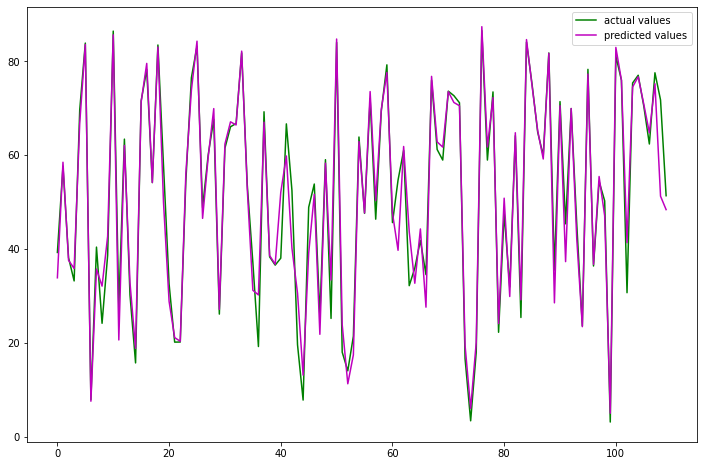

In [92]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [93]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.9543844431980028


In [94]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

3.0379878052416505
22.619033311681605


In [95]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 38.8771 - mae: 38.8771
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 36.3952 - mae: 36.3952
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 34.4363 - mae: 34.4363
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 32.6173 - mae: 32.6173
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 30.4711 - mae: 30.4711
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 27.7208 - mae: 27.7208
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 26.0164 - mae: 26.0164
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 24.0228 - mae: 24.0228
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 21.7755 - mae: 21.7755
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 19.3153 - mae: 19.3153
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 2ms/step - loss: 4.2657 - mae: 4.2657
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2438 - mae: 4.2438
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2077 - mae: 4.2077
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2591 - mae: 4.2591
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2470 - mae: 4.2470
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2023 - mae: 4.2023
Epoch 93/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2427 - mae: 4.2427
Epoch 94/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1762 - mae: 4.1762
Epoch 95/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1763 - mae: 4.1763
Epoch 96/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1881 - mae: 4.1881
Epoch 97/200
11/11 [==============================] - 0s 2ms/st

11/11 [==============================] - 0s 2ms/step - loss: 4.0547 - mae: 4.0547
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0496 - mae: 4.0496
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3819 - mae: 4.3819
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0781 - mae: 4.0781
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0376 - mae: 4.0376
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0546 - mae: 4.0546
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0597 - mae: 4.0597
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0467 - mae: 4.0467
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 4.0359 - mae: 4.0359
Epoch 181/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1306 - mae: 4.1306
Epoch 182/200
11/11 [==============================] -

In [96]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

4/4 [==============================] - 0s 1ms/step
R score is : 0.93335316956348


In [97]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

3.9741597875681784
33.04764829036655


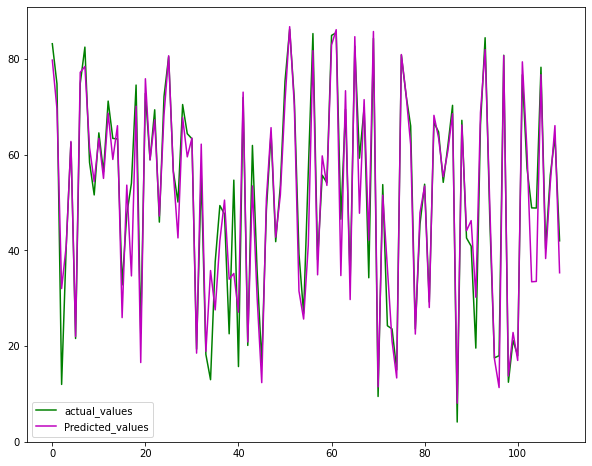

In [85]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()